<a href="https://colab.research.google.com/github/Miss-Dev/Aprendendo-Ciencia-de-dados-/blob/main/listaExercicios_aula05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estudante: Samara

In [1]:
#importando biblioteca pandas
import pandas as pd


In [16]:
#lendo o dataframe e adicionando a variável df
df = pd.read_csv('mushroom.csv')

In [3]:
df.head()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,label
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises?                  8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [6]:
#Estatística descritiva do dataframe
df.describe()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,label
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,5644,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,4,4,4,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [17]:
#valores únicos
df['label'].unique()

array(['p', 'e'], dtype=object)

In [18]:
import matplotlib.pyplot as plt

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises?                  8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [25]:
#identificando e tratando dados ausentes
df.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises?                       0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
label                          0
dtype: int64

In [26]:
#limpando dados ausentes
df = df.dropna(subset=['stalk-root'])
df.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
label                       0
dtype: int64

In [27]:
# X =  colunas de informação, variáveis independentes
X = df.drop('label', axis=1)
# y = Variável dependente, a qual será utilizada para classificar os dados
y = df['label']

In [28]:
X.head()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [29]:
#Importando o encoder para transformar as labels em chaves numéricas
from sklearn.preprocessing import OneHotEncoder
Oht_enc = OneHotEncoder()
X = pd.DataFrame(Oht_enc.fit_transform(X).A)

In [30]:
X.shape

(5644, 98)

In [31]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [32]:
#pré processamento dos dados
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [33]:
X_train

array([[-0.23933348, -0.02756938, -0.87733304, ..., -0.23695935,
         3.04298213, -0.26653558],
       [-0.23933348, -0.02756938,  1.13981801, ..., -0.23695935,
        -0.328625  , -0.26653558],
       [-0.23933348, -0.02756938,  1.13981801, ..., -0.23695935,
        -0.328625  , -0.26653558],
       ...,
       [-0.23933348, -0.02756938,  1.13981801, ..., -0.23695935,
        -0.328625  , -0.26653558],
       [ 4.17827045, -0.02756938, -0.87733304, ..., -0.23695935,
        -0.328625  , -0.26653558],
       [-0.23933348, -0.02756938, -0.87733304, ..., -0.23695935,
        -0.328625  , -0.26653558]])

In [34]:
#Importando o modelo KNN
from sklearn.neighbors import KNeighborsClassifier  

# Definindo o valor de visinhos
classifier = KNeighborsClassifier(n_neighbors=3)  

#Treinando o modelo, com dados de treinamento
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [35]:
# Prevendo os valores de Y para os dados de teste
y_pred = classifier.predict(X_test) 

In [37]:
# Importando métricas para validação do modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Imprimindo a matriz confusa
print("Matriz Confusa: ")
print(confusion_matrix(y_test, y_pred), "\n")  

# Imprimindo o relatório de classificação
print("Relatório de classificação: \n", classification_report(y_test, y_pred))  


# Imprimindo a acurácia do modelo
print('Acurácia do modelo: ' , accuracy_score(y_test, y_pred))


Matriz Confusa: 
[[1047    0]
 [   0  647]] 

Relatório de classificação: 
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1047
           p       1.00      1.00      1.00       647

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694

Acurácia do modelo:  1.0


In [39]:
#importando numpy
import numpy as np

In [43]:
#Pode-se testar diferentes K para o modelo
erro = []


for i in range(1, 15):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    erro.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Média de erro')

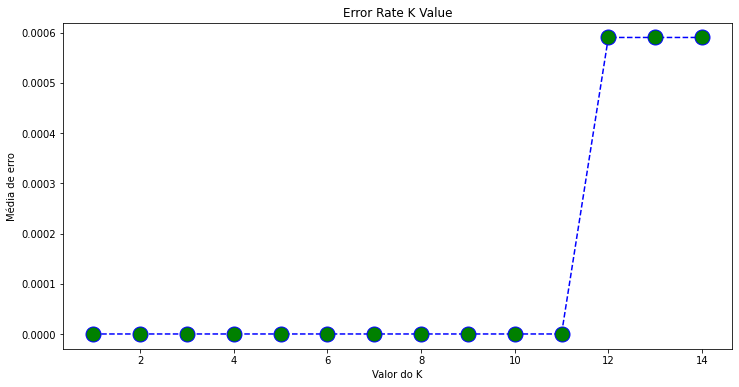

In [45]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 15), erro, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=15)
plt.title('Error Rate K Value')  
plt.xlabel('Valor do K')  
plt.ylabel('Média de erro')  

In [ ]:
#Com a observação acima percebo que não houve alteração signicativa entre os
#valores 1 até 11 de k, após isso há uma grande média de erro
#O valor 3 para k, foi bem adequado.